In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

In [103]:
root_dir = Path.cwd().parent.parent.parent

In [106]:
# Data loading perth
df_perth = pd.read_excel(root_dir /'Datasets/Stadium data/Stadium data/Perth.xlsx')
df_perth_wkts = pd.read_excel(root_dir /'Datasets/Stadium data/Stadium data/Perth.xlsx', sheet_name='wicket takers')

# Data loading Melbourne
df_melbourne = pd.read_excel(root_dir /'Datasets/Stadium data/Stadium data/Melbourne.xlsx')
df_melbourne_wkts = pd.read_excel(root_dir /'Datasets/Stadium data/Stadium data/Melbourne.xlsx', sheet_name='wicket takers')

# Data loading Adelaide
df_adelaide = pd.read_excel(root_dir /'Datasets/Stadium data/Stadium data/Adelaide.xlsx')
df_adelaide_wkts = pd.read_excel(root_dir /'Datasets/Stadium data/Stadium data/Adelaide.xlsx', sheet_name='wicket takers')

# Data loading Sydney
df_sydney = pd.read_excel(root_dir /'Datasets/Stadium data/Stadium data/Sydney.xlsx')
df_sydney_wkts = pd.read_excel(root_dir /'Datasets/Stadium data/Stadium data/Sydney.xlsx', sheet_name='wicket takers')

# Data loading Brisbane
df_brisbane = pd.read_excel(root_dir /'Datasets/Stadium data/Stadium data/Brisbane.xlsx')
df_brisbane_wkts = pd.read_excel(root_dir /'Datasets/Stadium data/Stadium data/Brisbane.xlsx', sheet_name='wicket takers')

In [111]:
# Only look at four bowlers NM Lyon (AUS), MA Starc (AUS), JR Hazlewood (AUS), PJ Cummins (AUS)
bowlers_of_interest = ['NM Lyon (AUS)', 'MA Starc (AUS)', 'JR Hazlewood (AUS)', 'PJ Cummins (AUS)','SM Boland (AUS)']
df_perth_wkts = df_perth_wkts[df_perth_wkts['Player'].isin(bowlers_of_interest)]
df_melbourne_wkts = df_melbourne_wkts[df_melbourne_wkts['Player'].isin(bowlers_of_interest)]
df_adelaide_wkts = df_adelaide_wkts[df_adelaide_wkts['Player'].isin(bowlers_of_interest)]
df_sydney_wkts = df_sydney_wkts[df_sydney_wkts['Player'].isin(bowlers_of_interest)]
df_brisbane_wkts = df_brisbane_wkts[df_brisbane_wkts['Player'].isin(bowlers_of_interest)]

In [112]:
df_perth_wkts['Stadium'] = 'Perth'
df_melbourne_wkts['Stadium'] = 'Melbourne'
df_adelaide_wkts['Stadium'] = 'Adelaide'
df_sydney_wkts['Stadium'] = 'Sydney'   
df_brisbane_wkts['Stadium'] = 'Brisbane'

/var/folders/qx/d6vwfn4179979vr76dn4k3440000gn/T/ipykernel_78240/2266673415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melbourne_wkts['Stadium'] = 'Melbourne'


In [113]:
dfs = [df_perth_wkts, df_melbourne_wkts, df_adelaide_wkts, df_sydney_wkts, df_brisbane_wkts]

In [115]:
# Concatenate all into one DataFrame
df_sr = pd.concat(dfs, ignore_index=True)

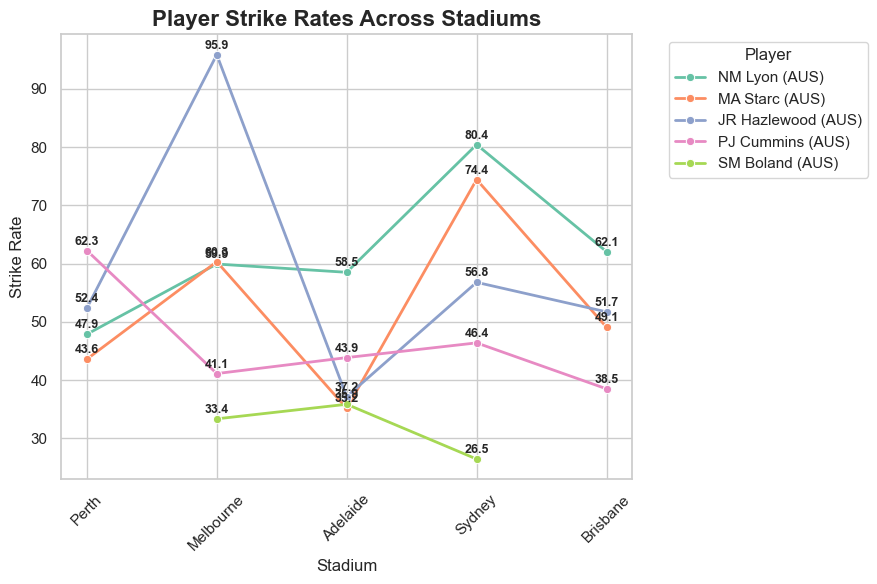

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(9,6))

# Line plot: hue=Player for colors, marker for clarity
ax = sns.lineplot(data=df_sr, x='Stadium', y='SR', hue='Player', marker='o', palette='Set2', linewidth=2)

# Annotate SR values
for player in df_sr['Player'].unique():
    player_data = df_sr[df_sr['Player'] == player]
    for idx, row in player_data.iterrows():
        ax.text(row['Stadium'], row['SR'] + 0.5, f"{row['SR']:.1f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title("Player Strike Rates Across Stadiums", fontsize=16, fontweight='bold')
plt.ylabel("Strike Rate")
plt.xlabel("Stadium")
plt.xticks(rotation=45)
plt.legend(title='Player', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


In [117]:
df_sr

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,10,Stadium,4w,5w,10w
0,NM Lyon (AUS),2018-2024,5,10,1389,231.3,39,605,29,6/128,20.86,2.61,47.89,1,2,-,Perth,NaN,NaN,NaN
1,MA Starc (AUS),2018-2024,5,10,1134,189.0,37,562,26,1952-05-01 00:00:00,21.61,2.97,43.61,1,1,-,Perth,NaN,NaN,NaN
2,JR Hazlewood (AUS),2018-2024,5,9,838,139.4,48,314,16,2029-04-01 00:00:00,19.62,2.24,52.37,1,-,-,Perth,NaN,NaN,NaN
3,PJ Cummins (AUS),2018-2024,5,9,934,155.4,35,395,15,1934-03-01 00:00:00,26.33,2.53,62.26,-,-,-,Perth,NaN,NaN,NaN
4,NM Lyon (AUS),2011-2024,14,26,2997,499.3,77,1579,50,1950-05-01 00:00:00,31.58,3.16,59.94,3,1,-,Melbourne,NaN,NaN,NaN
5,PJ Cummins (AUS),2017-2024,8,15,1687,281.1,64,712,41,2027-06-01 00:00:00,17.36,2.53,41.14,1,4,1,Melbourne,NaN,NaN,NaN
6,MA Starc (AUS),2016-2024,8,16,1569,261.3,56,865,26,1936-04-01 00:00:00,33.26,3.30,60.34,2,-,-,Melbourne,NaN,NaN,NaN
7,SM Boland (AUS),2021-2024,3,6,534,89,21,234,16,2025-07-06 00:00:00,14.62,2.62,33.37,-,1,-,Melbourne,NaN,NaN,NaN
8,JR Hazlewood (AUS),2014-2023,7,13,1534,255.4,72,634,16,1950-03-01 00:00:00,39.62,2.47,95.87,-,-,-,Melbourne,NaN,NaN,NaN
9,NM Lyon (AUS),2012-2024,14,26,3687,614.3,147,1598,63,7/152,25.36,2.60,58.52,2,4,1,Adelaide,NaN,NaN,NaN


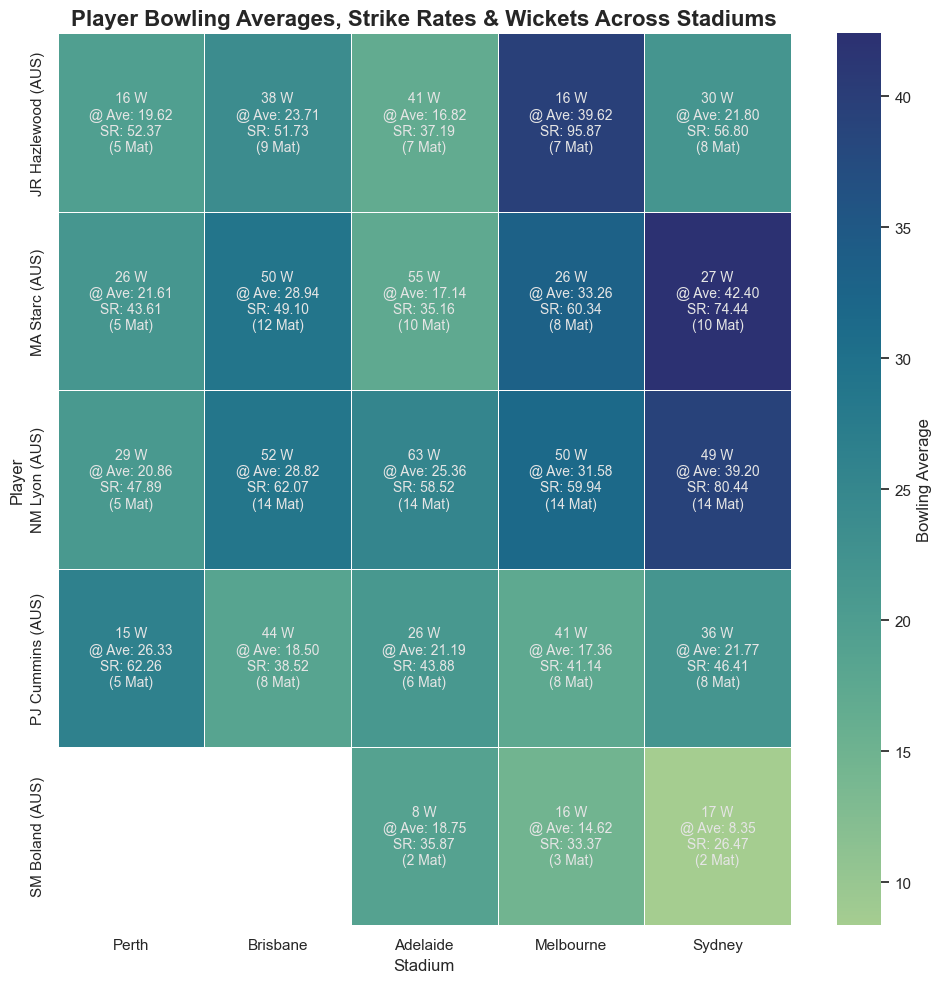

In [145]:
# Base metric for colour = Average (or SR, depending on what you want to emphasise)
avg_pivot = df_sr.pivot(index='Player', columns='Stadium', values='Ave')
sr_pivot  = df_sr.pivot(index='Player', columns='Stadium', values='SR')
wkts_pivot = df_sr.pivot(index='Player', columns='Stadium', values='Wkts')
mat_pivot  = df_sr.pivot(index='Player', columns='Stadium', values='Mat')

# Reorder columns
desired_order = ['Perth', 'Brisbane', 'Adelaide', 'Melbourne', 'Sydney']
avg_pivot = avg_pivot.reindex(columns=desired_order)
sr_pivot  = sr_pivot.reindex(columns=desired_order)
wkts_pivot = wkts_pivot.reindex(columns=desired_order)
mat_pivot  = mat_pivot.reindex(columns=desired_order)

# Align indexes
sr_pivot   = sr_pivot.reindex(index=avg_pivot.index)
wkts_pivot = wkts_pivot.reindex(index=avg_pivot.index)
mat_pivot  = mat_pivot.reindex(index=avg_pivot.index)

# Build custom annotations: "Wkts @ Ave , SR :  (Mat)"
annot = avg_pivot.copy().astype(object)

for i, player in enumerate(avg_pivot.index):
    for j, stadium in enumerate(avg_pivot.columns):
        avg = avg_pivot.loc[player, stadium]
        sr  = sr_pivot.loc[player, stadium]
        wkts = wkts_pivot.loc[player, stadium]
        mat  = mat_pivot.loc[player, stadium]

        # Defaults for blanks
        avg_val = 0.0 if pd.isna(avg) else float(avg)
        sr_val  = 0.0 if pd.isna(sr) else float(sr)
        wkts_val = 0 if pd.isna(wkts) else int(wkts)
        mat_val  = 0 if pd.isna(mat) else int(mat)

        annot.iat[i, j] = f"{wkts_val} W\n@ Ave: {avg_val:.2f}\nSR: {sr_val:.2f}\n({mat_val} Mat)"

plt.figure(figsize=(10, 10))
sns.set(style="white")

ax = sns.heatmap(
    avg_pivot,
    annot=annot,
    fmt="",
    cmap="crest",
    cbar_kws={'label': 'Bowling Average'},
    linewidths=0.5,
    linecolor='white',
    annot_kws={"size": 10, "color": "#E5E5E5"}  # adjust if contrast needed
)

plt.title("Player Bowling Averages, Strike Rates & Wickets Across Stadiums",
          fontsize=16, fontweight='bold')
plt.ylabel("Player")
plt.xlabel("Stadium")
plt.tight_layout()

plt.savefig(
    root_dir/'Articles/Ashes Stadium comparision/output/player_combined_heatmap.png',
    transparent=True,
    dpi=300
)

plt.show()


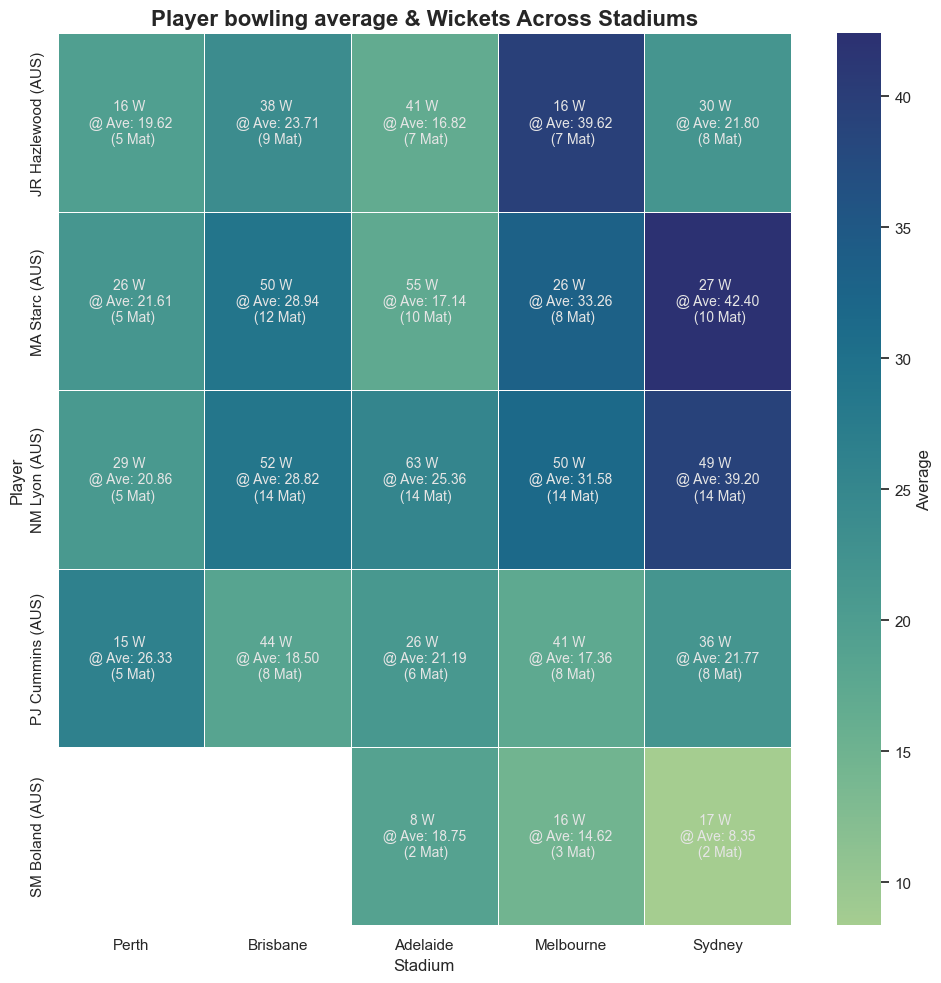

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Base metric for colour = SR
wkts_pivot = df_sr.pivot(index='Player', columns='Stadium', values='Wkts')
mat_pivot = df_sr.pivot(index='Player', columns='Stadium', values='Mat')

# Reorder columns
desired_order = ['Perth', 'Brisbane', 'Adelaide', 'Melbourne', 'Sydney']
sr_pivot = sr_pivot.reindex(columns=desired_order)
wkts_pivot = wkts_pivot.reindex(columns=desired_order)
mat_pivot = mat_pivot.reindex(columns=desired_order)

# Align indexes
wkts_pivot = wkts_pivot.reindex(index=sr_pivot.index)
mat_pivot = mat_pivot.reindex(index=sr_pivot.index)

# Build custom annotations: "Wkts @ SR (Mat)"
annot = sr_pivot.copy().astype(object)

for i, player in enumerate(sr_pivot.index):
    for j, stadium in enumerate(sr_pivot.columns):
        sr = sr_pivot.loc[player, stadium]
        wkts = wkts_pivot.loc[player, stadium]
        mat = mat_pivot.loc[player, stadium]

        # Defaults for blanks
        sr_val = 0.0 if pd.isna(sr) else float(sr)
        wkts_val = 0 if pd.isna(wkts) else int(wkts)
        mat_val = 0 if pd.isna(mat) else int(mat)

        annot.iat[i, j] = f"{wkts_val} W \n @ Ave: {sr_val:.2f} \n ({mat_val} Mat)"

plt.figure(figsize=(10, 10))
sns.set(style="white")

ax = sns.heatmap(
    sr_pivot,
    annot=annot,
    fmt="",                 # we supply full strings
    cmap="crest",
    cbar_kws={'label': 'Average'},
    linewidths=0.5,
    linecolor='white',
    annot_kws={"size": 10, "color": "#E5E5E5"}  # 👈 control annotation text style here

)

plt.title("Player bowling average & Wickets Across Stadiums", fontsize=16, fontweight='bold')
plt.ylabel("Player")
plt.xlabel("Stadium")
plt.tight_layout()

plt.savefig(
    root_dir/'Articles/Ashes Stadium comparision/output/player_avg_heatmap.png',
    transparent=True,
    dpi=300
)

plt.show()


In [80]:
# for win-loss ratio I will only take subset of data of last 10 matches at each stadium
df_adelaide_last10 = df_adelaide.head(10)
df_perth_last10 = df_perth.head(10)
df_brisbane_last10 = df_brisbane.head(10)
df_melbourne_last10 = df_melbourne.head(10)
df_sydney_last10 = df_sydney.head(10)


In [84]:
df_brisbane_last10

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,Australia,India,drawn,-,Brisbane,"Dec 14-18, 2024",Test # 2570
1,Australia,West Indies,West Indies,8 runs,Brisbane,"Jan 25-28, 2024",Test # 2524
2,Australia,South Africa,Australia,6 wickets,Brisbane,"Dec 17-18, 2022",Test # 2482
3,Australia,England,Australia,9 wickets,Brisbane,"Dec 8-11, 2021",Test # 2440
4,Australia,India,India,3 wickets,Brisbane,"Jan 15-19, 2021",Test # 2404
5,Australia,Pakistan,Australia,inns & 5 runs,Brisbane,"Nov 21-24, 2019",Test # 2368
6,Australia,Sri Lanka,Australia,inns & 40 runs,Brisbane,"Jan 24-26, 2019",Test # 2343
7,Australia,England,Australia,10 wickets,Brisbane,"Nov 23-27, 2017",Test # 2282
8,Australia,Pakistan,Australia,39 runs,Brisbane,"Dec 15-19, 2016",Test # 2240
9,Australia,New Zealand,Australia,208 runs,Brisbane,"Nov 5-9, 2015",Test # 2185


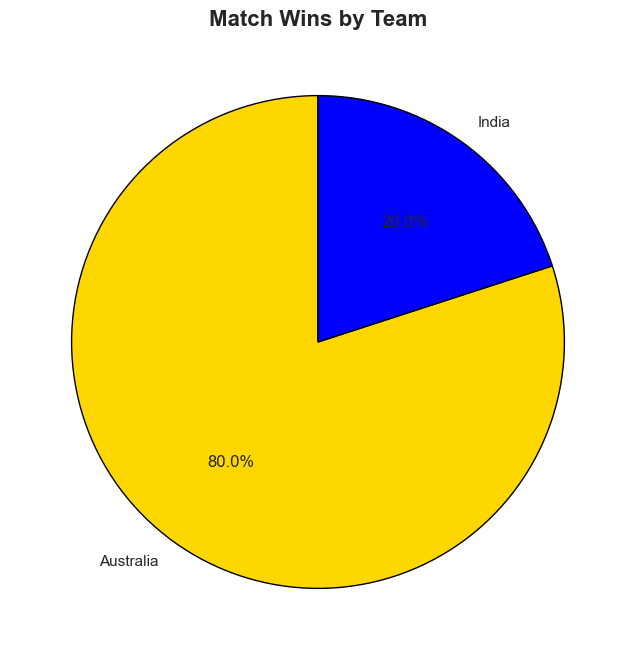

In [85]:
# Win ratios in different stadiums analysis 
import matplotlib.pyplot as plt

# Count wins
win_counts = df_perth_last10['Winner'].value_counts()

# Define colors for Australia and India
colors = []
for team in win_counts.index:
    if team == 'Australia':
        colors.append('gold')
    elif team == 'India':
        colors.append('blue')
    else:
        colors.append('lightgrey')

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    win_counts, 
    labels=win_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    wedgeprops=dict(edgecolor='black', linewidth=1)  # optional: bold slice edges
)
plt.title("Match Wins by Team", fontsize=16, fontweight='bold')

# Save figure
plt.savefig(
    root_dir/'Articles/Ashes Stadium comparision/output/perth_win_ratio_pie_chart.png', 
    bbox_inches='tight', 
    transparent=True, 
    dpi=300
)

plt.show()


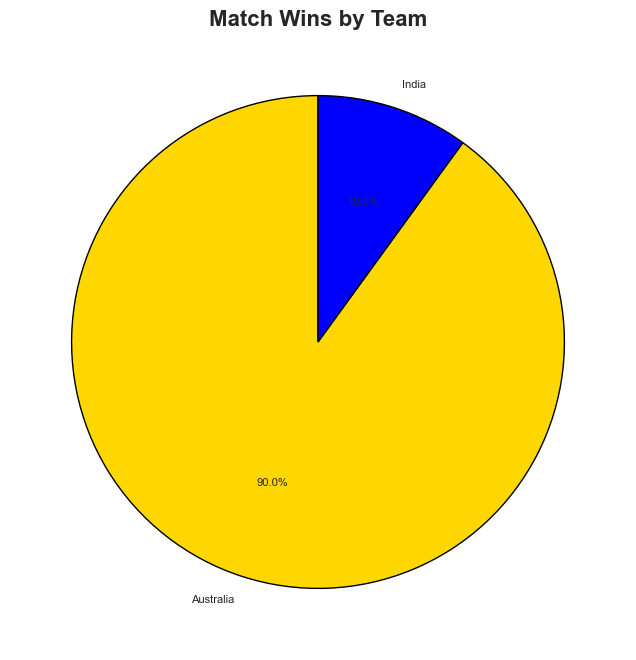

In [86]:
# Win ratios in different stadiums analysis 
import matplotlib.pyplot as plt

# Count wins
win_counts = df_adelaide_last10['Winner'].value_counts()

# Define colors for Australia and India
colors = []
for team in win_counts.index:
    if team == 'Australia':
        colors.append('gold')
    elif team == 'India':
        colors.append('blue')
    else:
        colors.append('lightgrey')

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    win_counts, 
    labels=win_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    wedgeprops=dict(edgecolor='black', linewidth=1),  # optional: bold slice edges
    textprops={'fontsize': 8}  # adjust font size here
)
plt.title("Match Wins by Team", fontsize=16, fontweight='bold')

# Save figure
plt.savefig(
    root_dir/'Articles/Ashes Stadium comparision/output/adelaide_win_ratio_pie_chart.png', 
    bbox_inches='tight', 
    transparent=True, 
    dpi=300
)

plt.show()


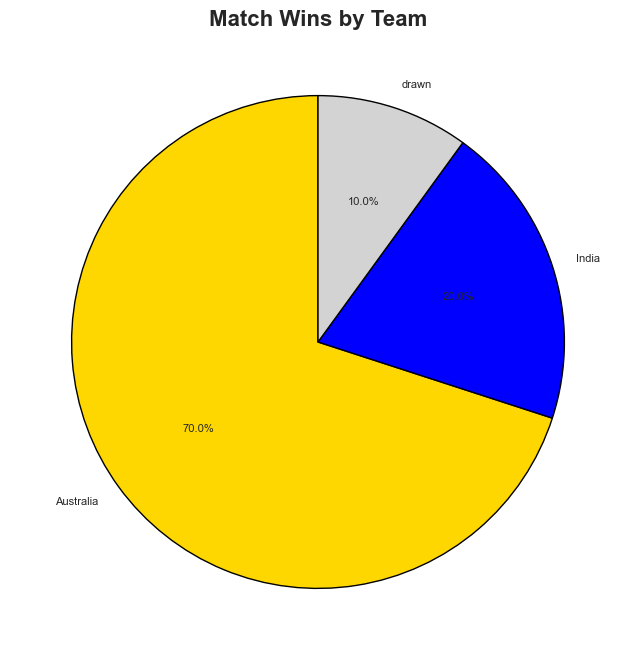

In [87]:
# Win ratios in different stadiums analysis 
import matplotlib.pyplot as plt

# Count wins
win_counts = df_melbourne_last10['Winner'].value_counts()

# Define colors for Australia and India
colors = []
for team in win_counts.index:
    if team == 'Australia':
        colors.append('gold')
    elif team == 'India':
        colors.append('blue')
    else:
        colors.append('lightgrey')

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    win_counts, 
    labels=win_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    wedgeprops=dict(edgecolor='black', linewidth=1),  # optional: bold slice edges
    textprops={'fontsize': 8}  # adjust font size here
)
plt.title("Match Wins by Team", fontsize=16, fontweight='bold')

# Save figure
plt.savefig(
    root_dir/'Articles/Ashes Stadium comparision/output/adelaide_win_ratio_pie_chart.png', 
    bbox_inches='tight', 
    transparent=True, 
    dpi=300
)

plt.show()


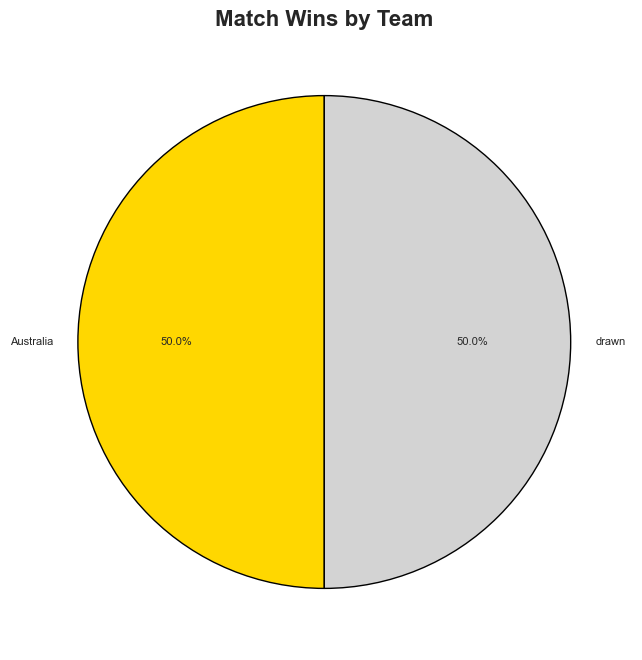

In [88]:
# Win ratios in different stadiums analysis 
import matplotlib.pyplot as plt

# Count wins
win_counts = df_sydney_last10['Winner'].value_counts()

# Define colors for Australia and India
colors = []
for team in win_counts.index:
    if team == 'Australia':
        colors.append('gold')
    elif team == 'India':
        colors.append('blue')
    else:
        colors.append('lightgrey')

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    win_counts, 
    labels=win_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    wedgeprops=dict(edgecolor='black', linewidth=1),  # optional: bold slice edges
    textprops={'fontsize': 8}  # adjust font size here
)
plt.title("Match Wins by Team", fontsize=16, fontweight='bold')

# Save figure
plt.savefig(
    root_dir/'Articles/Ashes Stadium comparision/output/adelaide_win_ratio_pie_chart.png', 
    bbox_inches='tight', 
    transparent=True, 
    dpi=300
)

plt.show()


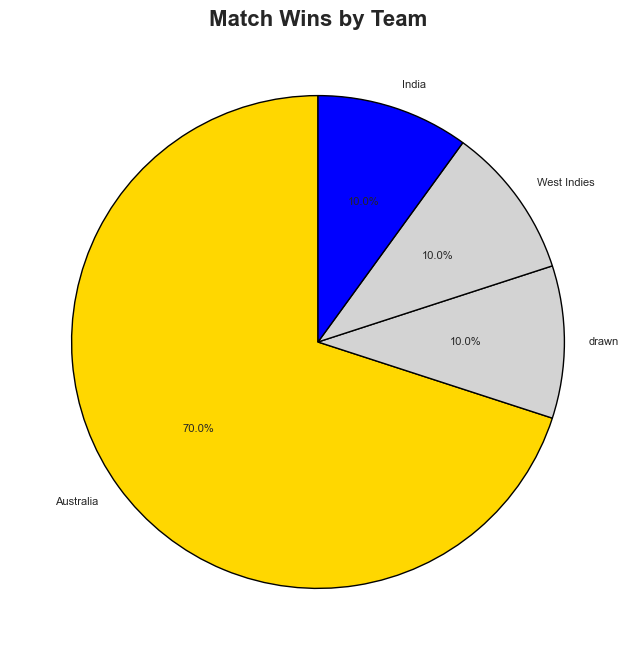

In [89]:
# Win ratios in different stadiums analysis 
import matplotlib.pyplot as plt

# Count wins
win_counts = df_brisbane_last10['Winner'].value_counts()

# Define colors for Australia and India
colors = []
for team in win_counts.index:
    if team == 'Australia':
        colors.append('gold')
    elif team == 'India':
        colors.append('blue')
    else:
        colors.append('lightgrey')

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    win_counts, 
    labels=win_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    wedgeprops=dict(edgecolor='black', linewidth=1),  # optional: bold slice edges
    textprops={'fontsize': 8}  # adjust font size here
)
plt.title("Match Wins by Team", fontsize=16, fontweight='bold')

# Save figure
plt.savefig(
    root_dir/'Articles/Ashes Stadium comparision/output/adelaide_win_ratio_pie_chart.png', 
    bbox_inches='tight', 
    transparent=True, 
    dpi=300
)

plt.show()


In [94]:
print("Adelaide")
print(df_adelaide_last10['Winner'].value_counts())
print("Melbourne")
print(df_melbourne_last10['Winner'].value_counts())
print("Brisbane")
print(df_brisbane_last10['Winner'].value_counts())
print("Sydney")
print(df_sydney_last10['Winner'].value_counts())
print("Perth")
print(df_perth_last10['Winner'].value_counts())

Adelaide
Winner
Australia    9
India        1
Name: count, dtype: int64
Melbourne
Winner
Australia    7
India        2
drawn        1
Name: count, dtype: int64
Brisbane
Winner
Australia      7
drawn          1
West Indies    1
India          1
Name: count, dtype: int64
Sydney
Winner
Australia    5
drawn        5
Name: count, dtype: int64
Perth
Winner
Australia    4
India        1
Name: count, dtype: int64


In [97]:
print("Adelaide")
print(df_adelaide_last10['Team 2'].value_counts())
print("Melbourne")
print(df_melbourne_last10['Team 2'].value_counts())
print("Brisbane")
print(df_brisbane_last10['Team 2'].value_counts())
print("Sydney")
print(df_sydney_last10['Team 2'].value_counts())
print("Perth")
print(df_perth_last10['Team 2'].value_counts())

Adelaide
Team 2
India           3
West Indies     2
England         2
Pakistan        1
South Africa    1
New Zealand     1
Name: count, dtype: int64
Melbourne
Team 2
India           3
Pakistan        2
England         2
South Africa    1
New Zealand     1
West Indies     1
Name: count, dtype: int64
Brisbane
Team 2
India           2
England         2
Pakistan        2
West Indies     1
South Africa    1
Sri Lanka       1
New Zealand     1
Name: count, dtype: int64
Sydney
Team 2
India           3
Pakistan        2
England         2
South Africa    1
New Zealand     1
West Indies     1
Name: count, dtype: int64
Perth
Team 2
India          2
Pakistan       1
West Indies    1
New Zealand    1
Name: count, dtype: int64


In [98]:
df_adelaide_last10

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,Australia,India,Australia,10 wickets,Adelaide,"Dec 6-8, 2024",Test # 2568
1,Australia,West Indies,Australia,10 wickets,Adelaide,"Jan 17-19, 2024",Test # 2523
2,Australia,West Indies,Australia,419 runs,Adelaide,"Dec 8-11, 2022",Test # 2479
3,Australia,England,Australia,275 runs,Adelaide,"Dec 16-20, 2021",Test # 2441
4,Australia,India,Australia,8 wickets,Adelaide,"Dec 17-19, 2020",Test # 2396
5,Australia,Pakistan,Australia,inns & 48 runs,Adelaide,"Nov 29-Dec 2, 2019",Test # 2372
6,Australia,India,India,31 runs,Adelaide,"Dec 6-10, 2018",Test # 2333
7,Australia,England,Australia,120 runs,Adelaide,"Dec 2-6, 2017",Test # 2285
8,Australia,South Africa,Australia,7 wickets,Adelaide,"Nov 24-27, 2016",Test # 2236
9,Australia,New Zealand,Australia,3 wickets,Adelaide,"Nov 27-29, 2015",Test # 2190


In [99]:
df_brisbane_last10

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,Australia,India,drawn,-,Brisbane,"Dec 14-18, 2024",Test # 2570
1,Australia,West Indies,West Indies,8 runs,Brisbane,"Jan 25-28, 2024",Test # 2524
2,Australia,South Africa,Australia,6 wickets,Brisbane,"Dec 17-18, 2022",Test # 2482
3,Australia,England,Australia,9 wickets,Brisbane,"Dec 8-11, 2021",Test # 2440
4,Australia,India,India,3 wickets,Brisbane,"Jan 15-19, 2021",Test # 2404
5,Australia,Pakistan,Australia,inns & 5 runs,Brisbane,"Nov 21-24, 2019",Test # 2368
6,Australia,Sri Lanka,Australia,inns & 40 runs,Brisbane,"Jan 24-26, 2019",Test # 2343
7,Australia,England,Australia,10 wickets,Brisbane,"Nov 23-27, 2017",Test # 2282
8,Australia,Pakistan,Australia,39 runs,Brisbane,"Dec 15-19, 2016",Test # 2240
9,Australia,New Zealand,Australia,208 runs,Brisbane,"Nov 5-9, 2015",Test # 2185


In [100]:
df_sydney_last10

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,Australia,India,Australia,6 wickets,Sydney,"Jan 3-5, 2025",Test # 2575
1,Australia,Pakistan,Australia,8 wickets,Sydney,"Jan 3-6, 2024",Test # 2521
2,Australia,South Africa,drawn,-,Sydney,"Jan 4-8, 2023",Test # 2488
3,Australia,England,drawn,-,Sydney,"Jan 5-9, 2022",Test # 2446
4,Australia,India,drawn,-,Sydney,"Jan 7-11, 2021",Test # 2402
5,Australia,New Zealand,Australia,279 runs,Sydney,"Jan 3-6, 2020",Test # 2378
6,Australia,India,drawn,-,Sydney,"Jan 3-7, 2019",Test # 2339
7,Australia,England,Australia,inns & 123 runs,Sydney,"Jan 4-8, 2018",Test # 2291
8,Australia,Pakistan,Australia,220 runs,Sydney,"Jan 3-7, 2017",Test # 2245
9,Australia,West Indies,drawn,-,Sydney,"Jan 3-7, 2016",Test # 2198


In [101]:
df_melbourne_last10

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,Australia,India,Australia,184 runs,Melbourne,"Dec 26-30, 2024",Test # 2571
1,Australia,Pakistan,Australia,79 runs,Melbourne,"Dec 26-29, 2023",Test # 2519
2,Australia,South Africa,Australia,inns & 182 runs,Melbourne,"Dec 26-29, 2022",Test # 2485
3,Australia,England,Australia,inns & 14 runs,Melbourne,"Dec 26-28, 2021",Test # 2442
4,Australia,India,India,8 wickets,Melbourne,"Dec 26-29, 2020",Test # 2398
5,Australia,New Zealand,Australia,247 runs,Melbourne,"Dec 26-29, 2019",Test # 2376
6,Australia,India,India,137 runs,Melbourne,"Dec 26-30, 2018",Test # 2337
7,Australia,England,drawn,-,Melbourne,"Dec 26-30, 2017",Test # 2289
8,Australia,Pakistan,Australia,inns & 18 runs,Melbourne,"Dec 26-30, 2016",Test # 2242
9,Australia,West Indies,Australia,177 runs,Melbourne,"Dec 26-29, 2015",Test # 2195
